In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

False

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [4]:
!unzip '/content/drive/MyDrive/Yolo/custom data.zip' -d '/content/drive/MyDrive/Yolo'

Archive:  /content/drive/MyDrive/Yolo/custom data.zip
  inflating: /content/drive/MyDrive/Yolo/custom data/1.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/1.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/10.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/10.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/11.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/11.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/12.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/12.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/13.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/13.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/14.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/14.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/15.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom data/15.txt  
  inflating: /content/drive/MyDrive/Yolo/custom data/16.jpg  
  inflating: /cont

In [5]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [6]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 5.55 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.
Checking out files: 100% (2044/2044), done.


In [7]:
%cd '/content/drive/MyDrive/Yolo/darknet'
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/Yolo/darknet


In [8]:
!make 

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [9]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [12]:
!python custom_data/creating-files-data-and-name.py

In [13]:
!python custom_data/creating-train-and-test-txt-files.py

In [26]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [17]:
!ls '/content/drive/MyDrive/Yolo/custom_weight '

darknet53.conv.74


In [23]:
!darknet/darknet

usage: darknet/darknet <function>


In [25]:
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/obj.cfg weight/darknet53.conv.74 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
obj
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 32, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26

In [33]:
%cd '/content/drive/MyDrive/Yolo/darknet'

/content/drive/MyDrive/Yolo/darknet


In [48]:
img_path = "/content/2.jpg"
!./darknet detector test data/labelled_data.data cfg/obj.cfg /content/drive/MyDrive/Yolo/backup/obj_60000.weights {img_path} -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128

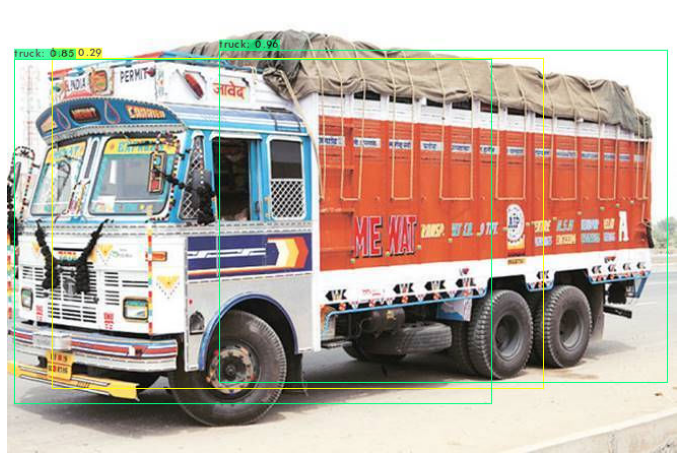

In [49]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [50]:
img_path = "/content/5.jpg"
!./darknet detector test data/labelled_data.data cfg/obj.cfg /content/drive/MyDrive/Yolo/backup/obj_60000.weights {img_path} -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128

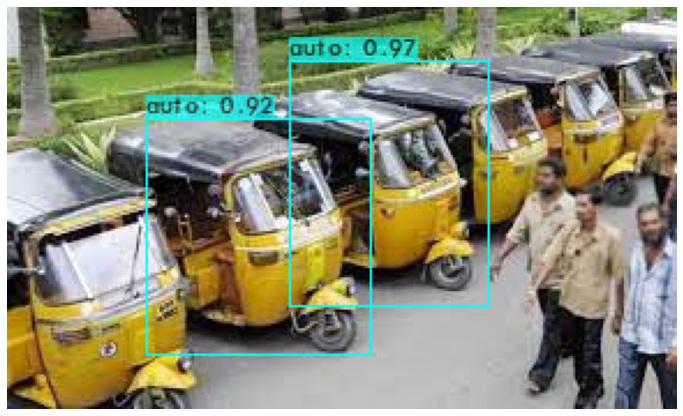

In [51]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [46]:
!./darknet detector demo data/labelled_data.data cfg/obj.cfg /content/drive/MyDrive/Yolo/backup/obj_60000.weights -dont_show /content/ot.mp4 -thresh 0.5 -i 0 -out_filename /content/drive/MyDrive/results2.mp4

Streaming output truncated to the last 5000 lines.

motorcycle: 86% 

FPS:16.7 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:


FPS:16.7 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 72% 

FPS:17.0 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 91% 

FPS:17.0 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 91% 

FPS:17.3 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 71% 
motorcycle: 70% 

FPS:17.4 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 67% 

FPS:17.2 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 61% 

FPS:17.3 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 74% 

FPS:17.5 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 78% 

FPS:17.5 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 82% 

FPS:17.7 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 73% 

FPS:17.6 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 84% 

FPS:17.2 	 AVG_FPS:16.0

 cvWriteFrame 
Objects:

motorcycle: 79% 

FPS:17.2 	 AVG_FPS:16.0

 cvWriteFrame 
Object

In [52]:
!./darknet detector demo data/labelled_data.data cfg/obj.cfg /content/drive/MyDrive/Yolo/backup/obj_60000.weights -dont_show /content/main.mp4 -thresh 0.5 -i 0 -out_filename /content/drive/MyDrive/results2.mp4

Streaming output truncated to the last 5000 lines.


FPS:20.6 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:

auto: 54% 

FPS:20.9 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:

auto: 54% 

FPS:21.2 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:21.1 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:21.6 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:22.3 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:22.8 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:23.9 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:24.0 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:24.2 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:

motorcycle: 53% 

FPS:23.7 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:

motorcycle: 58% 

FPS:22.8 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:

motorcycle: 57% 

FPS:22.6 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:22.6 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:

motorcycle: 50% 

FPS:21.7 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:22.5 	 AVG_FPS:20.7

 cvWriteFrame 
Objects:


FPS:22.7 	 AVG_FPS:20.7

 cvWriteFrame 
O